In [1]:
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook as tqdm
from scipy.fftpack import dct, idct
import seaborn as sns
%matplotlib inline


In [2]:
class ImageLoader:
    def __init__(self,FILE_PATH):
            self.img = np.array(Image.open(FILE_PATH))
            
    def get_points(self,POINT):
        Row = random.randint(0,len(self.img)-POINT-1)
        Col = random.randint(0,len(self.img)-1)
        return self.img[Row:Row+POINT,Col]

In [3]:
def get_data_simple_connect(data):
    return np.hstack((data,data))

In [4]:
def get_data_even_connect(data):
    return np.hstack((data,data[::-1]))

In [5]:
# 原点で点対称
def get_data_odd_connect(data):
    return np.hstack((data,data[::-1]*(-1)))

In [6]:
# ランチョス法を適用後に奇接続する場合
def get_data_odd_connect2(data):
    bias = data[0]
    data -= bias
    data_odd = get_data_odd_connect(data)
    data_odd += bias
    return data_odd

In [7]:
# ランチョスしたのを返す
def Lanczos(data):
    points = len(data)
    left = int(data[0])
    right = int(data[len(data)-1])
    result = np.zeros(points)

    for i in range(points):
#         result[i] = data[i] - ((right-left)*i/(points-1) + left)
        result[i] = data[i] - ((right-left)*i/(points-1))
    
    return result

In [8]:
# plt.rcParams['font.family'] ='sans-serif'#使用するフォント
# plt.rcParams["font.sans-serif"] = "Source Han Sans"
plt.rcParams['font.family'] ='Source Han Sans JP' #使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 12 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
matplotlib.font_manager._rebuild()

# 画像の用意

In [9]:
AIRPLANE   = ImageLoader("Mono/Airplane.bmp")
BARBARA    = ImageLoader("Mono/BARBARA.bmp")
BOAT       = ImageLoader("Mono/BOAT.bmp")
BRIDGE     = ImageLoader("Mono/BRIDGE.bmp")
BUILDING   = ImageLoader("Mono/Building.bmp")
CAMERAMAN  = ImageLoader("Mono/Cameraman.bmp")
GIRL       = ImageLoader("Mono/girl.bmp")
LAX        = ImageLoader("Mono/LAX.bmp")
LENNA      = ImageLoader("Mono/LENNA.bmp")
LIGHTHOUSE = ImageLoader("Mono/Lighthouse.bmp")
SIDBAtitle = ImageLoader("Mono/SIDBAtitle256.bmp")
TEXT       = ImageLoader("Mono/Text.bmp")
WOMAN      = ImageLoader("Mono/WOMAN.bmp")

In [10]:
Images = np.array(
    [
        AIRPLANE,BARBARA,BOAT,
        BRIDGE,BUILDING,CAMERAMAN,
        GIRL,LAX,LENNA,
        LIGHTHOUSE,SIDBAtitle,TEXT,
        WOMAN
    ]
)

# 信号の用意

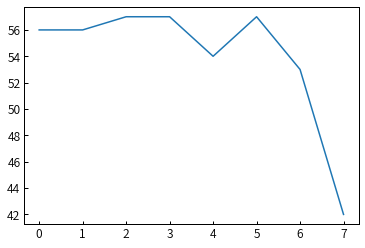

In [11]:
N = 16
data = LENNA.get_points(N//2)
plt.plot(data)
# plt.savefig('output/output_15.png',dpi=300)

In [11]:
# x = np.arange(0,8,1)
# xx = np.arange(1,9,1)
lin = np.linspace(data[0],data[7],8)
plt.plot(data)
plt.plot(lin)
# plt.plot(xx,data)
# plt.plot(x,lin)
plt.savefig('output/output_16.png',dpi=300)

NameError: name 'data' is not defined

# 単純接続

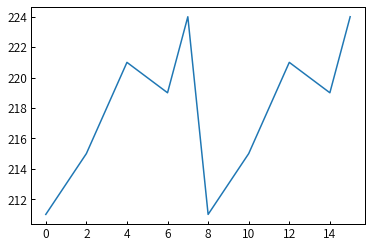

In [31]:
data_s = get_data_simple_connect(data)
plt.plot(data_s)
plt.savefig('output/output_12.png',dpi=300)

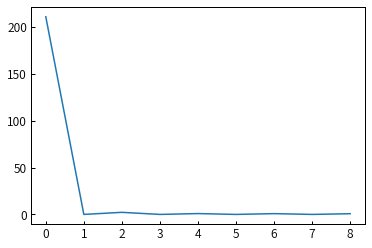

In [13]:
# 高速フーリエ変換(FFT)
F_s = np.fft.fft(data_s)
# FFT結果（複素数）を絶対値に変換
F_s_abs = np.abs(F_s)
# 振幅を元に信号に揃える
F_s_abs_amp = F_s_abs / N * 2 # 交流成分はデータ数で割って2倍する
F_s_abs_amp[0] = F_s_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

# グラフ表示（データ数の半分の周期を表示）
plt.plot(F_s_abs_amp[:N//2+1])

# 偶接続

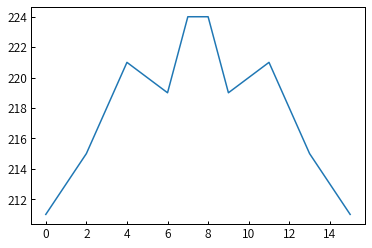

In [29]:
data_even = get_data_even_connect(data)
plt.plot(data_even)
plt.savefig('output/output_13.png',dpi=300)

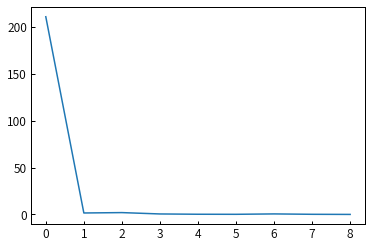

In [15]:
F_e = np.fft.fft(data_even)
F_e_abs = np.abs(F_e)
F_e_abs_amp = F_e_abs / N * 2 
F_e_abs_amp[0] = F_e_abs_amp[0] / 2 

plt.plot(F_e_abs_amp[:N//2+1])

# 偶接続(ランチョス)

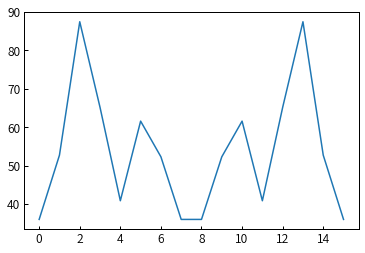

In [20]:
data_lanczos = Lanczos(data)
data_l_even = get_data_even_connect(data_lanczos)
plt.plot(data_l_even)

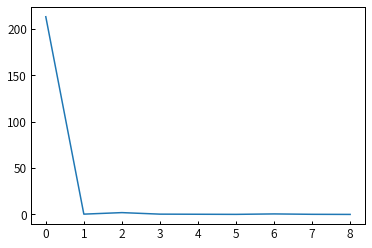

In [17]:
F_l_e = np.fft.fft(data_l_even)
F_l_e_abs = np.abs(F_l_e)
F_l_e_abs_amp = F_l_e_abs / N * 2
F_l_e_abs_amp[0] = F_l_e_abs_amp[0] / 2

plt.plot(F_l_e_abs_amp[:N//2+1])

# 奇接続(ランチョス)

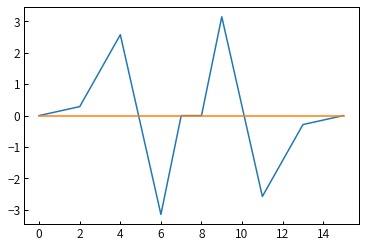

In [44]:
data_lanczos = Lanczos(data)
data_odd = get_data_odd_connect2(data_lanczos)
plt.plot(data_odd - data_odd[0])
plt.plot(np.linspace(0,0,16))
plt.savefig('output/output_18.png',dpi=300)

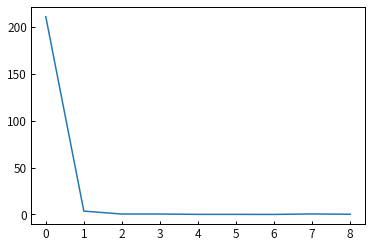

In [19]:
F_o = np.fft.fft(data_odd)
F_o_abs = np.abs(F_o)
F_o_abs_amp = F_o_abs / N * 2 
F_o_abs_amp[0] = F_o_abs_amp[0] / 2 

plt.plot(F_o_abs_amp[:N//2+1])

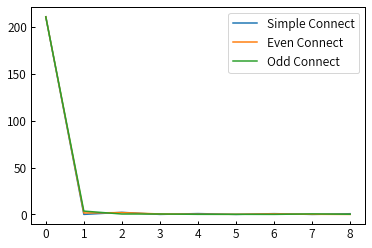

In [20]:
plt.plot(F_s_abs_amp[:N//2+1],label="Simple Connect")
plt.plot(F_e_abs_amp[:N//2+1],label="Even Connect")
plt.plot(F_o_abs_amp[:N//2+1],label="Odd Connect")
plt.legend()

In [21]:
F_s_abs_amp

array([211.125     ,   0.        ,   2.22122046,   0.        ,
         0.90138782,   0.        ,   0.83137215,   0.        ,
         0.75      ,   0.        ,   0.83137215,   0.        ,
         0.90138782,   0.        ,   2.22122046,   0.        ])

In [22]:
F_e_abs_amp

array([2.11125000e+02, 1.53541264e+00, 1.94342992e+00, 4.88728131e-01,
       1.76776695e-01, 1.13950173e-01, 5.34396982e-01, 1.25172609e-01,
       0.00000000e+00, 1.25172609e-01, 5.34396982e-01, 1.13950173e-01,
       1.76776695e-01, 4.88728131e-01, 1.94342992e+00, 1.53541264e+00])

In [23]:
F_o_abs_amp

array([2.11000000e+02, 3.55647781e+00, 4.17621735e-01, 4.38291042e-01,
       7.57614408e-02, 8.02491876e-02, 1.83571295e-02, 5.27187465e-01,
       1.78571429e-01, 5.27187465e-01, 1.83571295e-02, 8.02491876e-02,
       7.57614408e-02, 4.38291042e-01, 4.17621735e-01, 3.55647781e+00])

# 平均をとってみる

In [11]:
N = 32
LOOP_COUNT = 10000
F_s = np.zeros(N)
F_e = np.zeros(N)
F_l_e = np.zeros(N)
F_o = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = LENNA.get_points(N//2)
    data_L = Lanczos(data)
    
    data_s = get_data_simple_connect(data)
    data_e = get_data_even_connect(data)
    data_l_e = get_data_even_connect(data_L)
    data_o = get_data_odd_connect2(data_L)
    
    F_s += abs(np.fft.fft(data_s))
    F_e += abs(np.fft.fft(data_e))
    F_l_e += abs(np.fft.fft(data_l_e))
    F_o += abs(np.fft.fft(data_o))
    
F_s /= LOOP_COUNT
F_e /= LOOP_COUNT
F_l_e /= LOOP_COUNT
F_o /= LOOP_COUNT

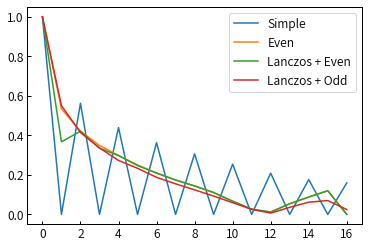

In [13]:
F_s_abs = np.abs(F_s)
F_s_abs_amp = F_s_abs / N * 2 
F_s_abs_amp[0] = F_s_abs_amp[0] / 2 
F_s_abs_amp[F_s_abs_amp == 0] = 1
F_s_abs_amp_log = np.log10(F_s_abs_amp)
plt.plot(np.abs(F_s_abs_amp_log[:N//2+1]/F_s_abs_amp_log.max()),label="Simple")

F_e_abs = np.abs(F_e)
F_e_abs_amp = F_e_abs / N * 2 
F_e_abs_amp[0] = F_e_abs_amp[0] / 2
F_e_abs_amp[F_e_abs_amp == 0] = 1
F_e_abs_amp_log = np.log10(F_e_abs_amp)
plt.plot(np.abs(F_e_abs_amp_log[:N//2+1]/F_e_abs_amp_log.max()),label="Even")

F_l_e_abs = np.abs(F_l_e)
F_l_e_abs_amp = F_l_e_abs / N * 2 
F_l_e_abs_amp[0] = F_l_e_abs_amp[0] / 2
F_l_e_abs_amp[F_l_e_abs_amp == 0] = 1
F_l_e_abs_amp_log = np.log10(F_l_e_abs_amp)
plt.plot(np.abs(F_l_e_abs_amp_log[:N//2+1]/F_l_e_abs_amp_log.max()),label="Lanczos + Even")

F_o_abs = np.abs(F_o)
F_o_abs_amp = F_o_abs / N * 2 
F_o_abs_amp[0] = F_o_abs_amp[0] / 2
F_o_abs_amp[F_o_abs_amp == 0] = 1
F_o_abs_amp_log = np.log10(F_o_abs_amp)
plt.plot(np.abs(F_o_abs_amp_log[:N//2+1]/F_o_abs_amp_log.max()),label="Lanczos + Odd")
plt.legend()
plt.savefig('output/output_4.png',dpi=300)

log10を取った  
ランチョス法+奇接続が偶接続より小さい？  
波形の変形が入ってるのでなんとも言えない  
ただ、どちらも高周波が小さくなることがわかる  

Simpleが飛び飛びに0が現れる件について  
正弦波の1周期分をN個の信号列で取得したとする  
2周期分をN個の信号列で取得した場合、前者は周波数1、後者は周波数2だと考えられる  
では、正弦波の2周期分を2N個の信号列で取得した場合はどうだろうか。  
この場合は、周波数領域における離散化間隔が短くなる  
1,2,3...だったものが、1.5,2,2.5,3...となるから、という理由で問題ないだろうか  
定義式とにらめっこして見たいところ。  
周波数分解能を上げるためには、時間窓長を大きくする
https://www.onosokki.co.jp/HP-WK/c_support/faq/fft_common/fft_analys_4.htm

ランチョス+偶接続でスペクトルが小さくなるなら、うまいことすれば全体、部分的に任意のスペクトルを小さくできるのでは  
ランチョスすると、基本的には波形が変化するがスペクトルの変化に大きな差がない
ランチョス+奇接続した信号も同様に波形が変化するが、スペクトルは偶接続に比べ小さくなることは有効な手段だと考えられる


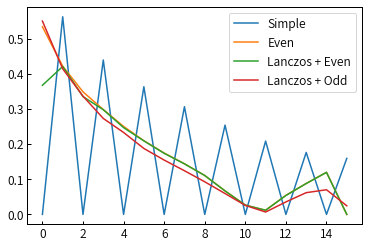

In [14]:
F_s_abs = np.abs(F_s)
F_s_abs_amp = F_s_abs / N * 2 
F_s_abs_amp[0] = F_s_abs_amp[0] / 2 
F_s_abs_amp[F_s_abs_amp == 0] = 1
F_s_abs_amp_log = np.log10(F_s_abs_amp)
plt.plot(np.abs(F_s_abs_amp_log[1:N//2+1]/F_s_abs_amp_log.max()),label="Simple")

F_e_abs = np.abs(F_e)
F_e_abs_amp = F_e_abs / N * 2 
F_e_abs_amp[0] = F_e_abs_amp[0] / 2
F_e_abs_amp[F_e_abs_amp == 0] = 1
F_e_abs_amp_log = np.log10(F_e_abs_amp)
plt.plot(np.abs(F_e_abs_amp_log[1:N//2+1]/F_e_abs_amp_log.max()),label="Even")

F_l_e_abs = np.abs(F_l_e)
F_l_e_abs_amp = F_l_e_abs / N * 2 
F_l_e_abs_amp[0] = F_l_e_abs_amp[0] / 2
F_l_e_abs_amp[F_l_e_abs_amp == 0] = 1
F_l_e_abs_amp_log = np.log10(F_l_e_abs_amp)
plt.plot(np.abs(F_l_e_abs_amp_log[1:N//2+1]/F_l_e_abs_amp_log.max()),label="Lanczos + Even")

F_o_abs = np.abs(F_o)
F_o_abs_amp = F_o_abs / N * 2 
F_o_abs_amp[0] = F_o_abs_amp[0] / 2
F_o_abs_amp[F_o_abs_amp == 0] = 1
F_o_abs_amp_log = np.log10(F_o_abs_amp)
plt.plot(np.abs(F_o_abs_amp_log[1:N//2+1]/F_o_abs_amp_log.max()),label="Lanczos + Odd")
plt.legend()
plt.savefig('output/output_4.png',dpi=300)

# logはとらないで

In [13]:
N = 32
LOOP_COUNT = 10000
F_s = np.zeros(N)
F_e = np.zeros(N)
F_l_e = np.zeros(N)
F_o = np.zeros(N)

for i in tqdm(range(LOOP_COUNT)):
    data = LENNA.get_points(N//2)
    data_L = Lanczos(data)
    
    data_s = get_data_simple_connect(data)
    data_e = get_data_even_connect(data)
    data_l_e = get_data_even_connect(data_L)
    data_o = get_data_odd_connect2(data_L)
    
    F_s += abs(np.fft.fft(data_s))
    F_e += abs(np.fft.fft(data_e))
    F_l_e += abs(np.fft.fft(data_l_e))
    F_o += abs(np.fft.fft(data_o))
    
F_s /= LOOP_COUNT
F_e /= LOOP_COUNT
F_l_e /= LOOP_COUNT
F_o /= LOOP_COUNT

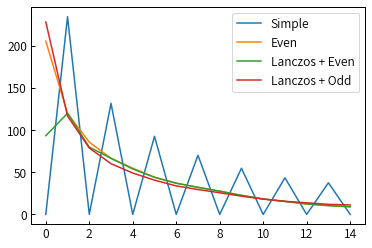

In [12]:
plt.plot(F_s[1:16],label="Simple")
plt.plot(F_e[1:16],label="Even")
plt.plot(F_l_e[1:16],label="Lanczos + Even")
plt.plot(F_o[1:16],label="Lanczos + Odd")
plt.legend()

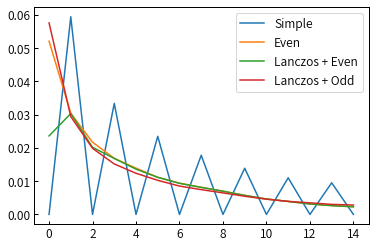

In [13]:
plt.plot(F_s[1:16]/F_s[0],label="Simple")
plt.plot(F_e[1:16]/F_e[0],label="Even")
plt.plot(F_l_e[1:16]/F_l_e[0],label="Lanczos + Even")
plt.plot(F_o[1:16]/F_o[0],label="Lanczos + Odd")
plt.legend()

In [18]:
print(F_s[:18])
print(F_e[:18])
F_l_e_abs_amp_log = np.log10(F_l_e_abs_amp)
print(F_l_e_abs_amp_log[:18])
print(F_l_e[:18])
print(F_o[:18])


[3947.2842        0.          234.68456594    0.          131.81848348
    0.           92.7207525     0.           70.21561863    0.
   54.77700991    0.           43.48293496    0.           37.52599102
    0.           33.9198        0.        ]
[3947.2842      205.70071559  120.06025892   85.7642138    66.6067301
   54.92661079   44.10237221   37.15510711   32.17774261   27.63659883
   22.6403716    18.30251227   15.45247729   12.42226414   10.44681466
    9.09531697    0.            9.09531697]
[ 2.09224726  0.76639146  0.87527929  0.69826384  0.61939813  0.527587
  0.44034197  0.36373838  0.30343559  0.23710904  0.15076357  0.05945584
 -0.01512187 -0.1097321  -0.18513609 -0.24505495        -inf -0.24505495]
[3957.2842       93.43539883  120.06025892   79.87002495   66.6067301
   53.914674     44.10237221   36.97075904   32.17774261   27.62034044
   22.6403716    18.3474546    15.45247729   12.42761771   10.44681466
    9.10049534    0.            9.10049534]
[3966.352       228.4

/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


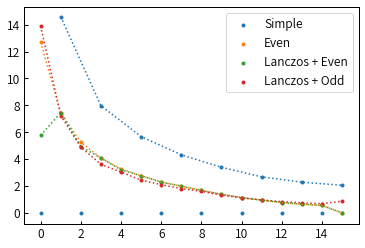

In [26]:
F_s_abs = np.abs(F_s)
F_s_abs_amp = F_s_abs / N * 2 
F_s_abs_amp[0] = F_s_abs_amp[0] / 2 
# plt.plot(F_s_abs_amp[1:N//2+1],label="Simple")
plt.scatter(np.arange(0,16,1),F_s_abs_amp[1:N//2+1],label="Simple",marker='.')
plt.plot(np.arange(1,16,2),F_s_abs_amp[2:N//2+1:2],linestyle = "dotted")

# F_s_abs_amp[F_s_abs_amp == 0] = 1
# F_s_abs_amp_log = np.log10(F_s_abs_amp)
# plt.plot(np.abs(F_s_abs_amp_log[:N//2+1]/F_s_abs_amp_log.max()),label="Simple")

F_e_abs = np.abs(F_e)
F_e_abs_amp = F_e_abs / N * 2 
F_e_abs_amp[0] = F_e_abs_amp[0] / 2
plt.scatter(np.arange(0,16,1),F_e_abs_amp[1:N//2+1],label="Even",marker='.')
plt.plot(F_e_abs_amp[1:N//2+1],linestyle = "dotted")
# F_e_abs_amp[F_e_abs_amp == 0] = 1
# F_e_abs_amp_log = np.log10(F_e_abs_amp)
# plt.plot(np.abs(F_e_abs_amp_log[:N//2+1]/F_e_abs_amp_log.max()),label="Even")

F_l_e_abs = np.abs(F_l_e)
F_l_e_abs_amp = F_l_e_abs / N * 2 
F_l_e_abs_amp[0] = F_l_e_abs_amp[0] / 2
plt.scatter(np.arange(0,16,1),F_l_e_abs_amp[1:N//2+1],label="Lanczos + Even",marker='.')
plt.plot(F_l_e_abs_amp[1:N//2+1],linestyle="dotted")
# F_l_e_abs_amp[F_l_e_abs_amp == 0] = 1
# F_l_e_abs_amp_log = np.log10(F_l_e_abs_amp)
# plt.plot(np.abs(F_l_e_abs_amp_log[:N//2+1]/F_l_e_abs_amp_log.max()),label="Lanczos + Even")

F_o_abs = np.abs(F_o)
F_o_abs_amp = F_o_abs / N * 2 
F_o_abs_amp[0] = F_o_abs_amp[0] / 2
plt.scatter(np.arange(0,16,1),F_o_abs_amp[1:N//2+1],label="Lanczos + Odd",marker='.')
plt.plot(F_o_abs_amp[1:N//2+1],linestyle="dotted")
# F_o_abs_amp[F_o_abs_amp == 0] = 1
# F_o_abs_amp_log = np.log10(F_o_abs_amp)
# plt.plot(np.abs(F_o_abs_amp_log[:N//2+1]/F_o_abs_amp_log.max()),label="Lanczos + Odd")

plt.xlabel('k')
plt.ylabel('|Fk')
plt.legend()
plt.savefig('output/output_19.png',dpi=300)

In [25]:
F_s_abs_amp[2:N//2+1:2]

array([14.74165119,  8.25369805,  5.81334332,  4.39417948,  3.40916845,
        2.75134245,  2.36162681,  2.1499    ])